# 2.2 Visualização de Dados
## BIBLIOTECAS

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

## LEITURA DO DATASET

In [2]:
#leitura do dataset de casos confirmados
confirmed_cases = pd.read_csv("outputs/base_covid_tratada.csv", encoding = "ISO-8859-1", sep=';',header=0)
confirmed_cases.head(2)

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_tipo_teste,_distrito,_bairro_mapa
0,25.0,20a - 29a,F,ADRIANOPOLIS,Confirmado,Recuperado,20/03/2020,RT-PCR,SUL,ADRIANÓPOLIS
1,41.0,40a - 49a,F,BETANIA,Confirmado,Recuperado,27/03/2020,RT-PCR,SUL,BETÂNIA


## Visualização dos Dados

### 3. Número de novos casos nos ultimos 10 dias

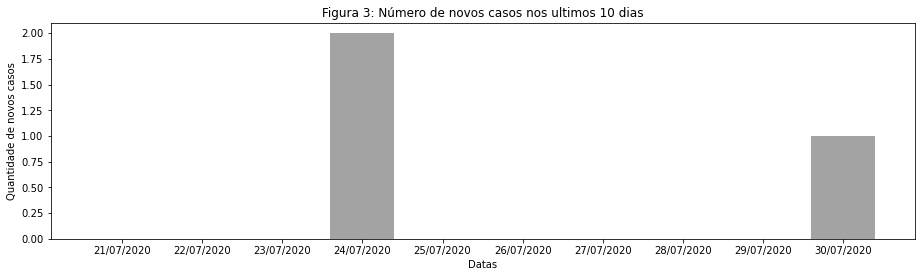

In [3]:
# configuracao da base de dados
data = confirmed_cases

# captura da data mais recente
day = pd.to_datetime(data['_dt_notificacao'], format="%d/%m/%Y").max()
dates = []
new_cases = []

# gerando lista de datas a n dias anterioes
for i in range(10):
    one_day = dt.timedelta(days=1)
    day = day - one_day
    dates.append(day.strftime("%d/%m/%Y"))
    new_cases.append(len(data[data['_dt_notificacao']==day.strftime("%d/%m/%Y")]))

# configuracao de construcao do grafico
fig = plt.figure(figsize=(12,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(dates[::-1], new_cases[::-1], color=(0.4, 0.4, 0.4, 0.6))
plt.xlabel('Datas')
plt.ylabel('Quantidade de novos casos')
plt.title('Figura 3: Número de novos casos nos ultimos 10 dias')
plt.show()

### 4: Número de casos recuperados nos ultimos 10 dias

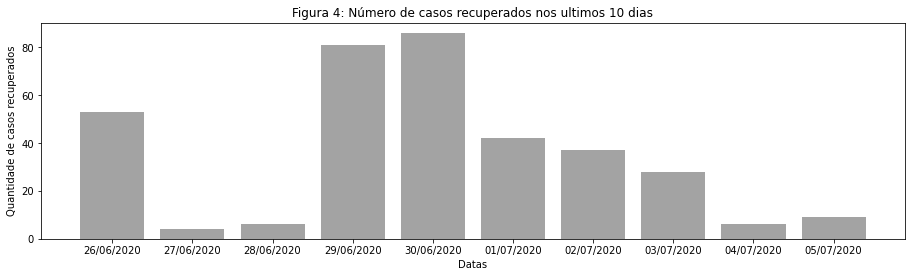

In [4]:
# configuracao da base de dados
data = confirmed_cases[confirmed_cases['_conclusao']==day.strftime("Recuperado")]

# captura da data mais recente
day = pd.to_datetime(data['_dt_notificacao'], format="%d/%m/%Y").max()

# gerando lista de datas a n dias anterioes
dates = []
new_cases = []
for i in range(10):
    one_day = dt.timedelta(days=1)
    day = day - one_day
    dates.append(day.strftime("%d/%m/%Y"))
    new_cases.append(len(data[data['_dt_notificacao']==day.strftime("%d/%m/%Y")]))

# configuracao de construcao do grafico
fig = plt.figure(figsize=(12,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(dates[::-1], new_cases[::-1], color=(0.4, 0.4, 0.4, 0.6))
plt.xlabel('Datas')
plt.ylabel('Quantidade de casos recuperados')
plt.title('Figura 4: Número de casos recuperados nos ultimos 10 dias')
plt.show()

### 5: Número casos por faixa etária

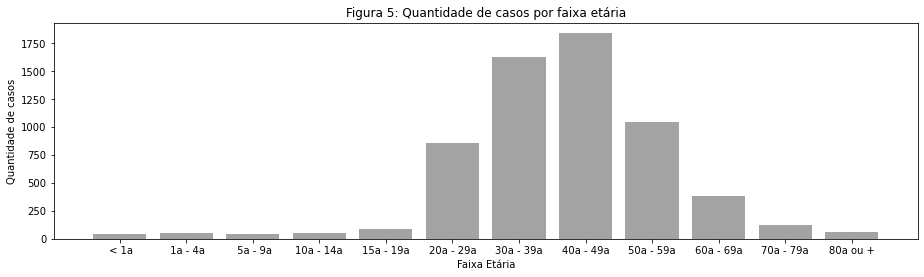

In [12]:
# configuracao da base de dados
data = confirmed_cases


# agrupamento por faixa etaria
groups = data.groupby(['_faixa etária'])
age_groups = groups.groups.keys()
cases = groups.size().array

# funcao de ajuste de ordenacao especifica
def sorting_adjustment(list_items):
    list_aux = list(list_items)
    aux = list_aux[2]
    del(list_aux[2])
    list_aux.insert(0, aux)
    return list_aux

age_groups = sorting_adjustment(age_groups)
cases = sorting_adjustment(cases)

# configuracao de construcao do grafico
fig = plt.figure(figsize=(12,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(age_groups, cases, color=(0.4, 0.4, 0.4, 0.6))
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de casos')
plt.title('Figura 5: Quantidade de casos por faixa etária')
plt.show()

### 6: Quantidade cumulativa de casos notificados ao longo do tempo

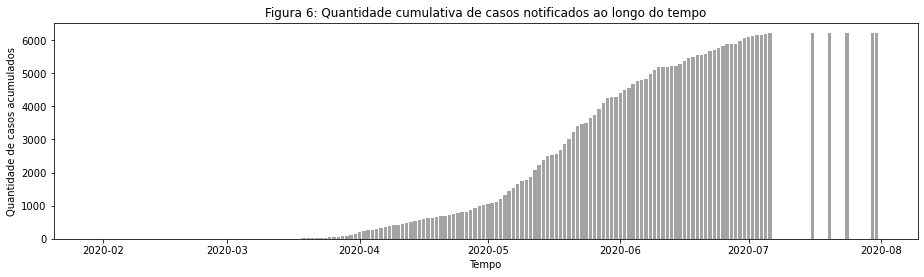

In [13]:
# configuracao da base de dados
data = confirmed_cases

# convertendo string para objetos datetime para manipulacao e ordenacao
data['notified_cases'] = pd.to_datetime(data['_dt_notificacao'], format="%d/%m/%Y")
data = data.sort_values(by=['notified_cases'])

# agrupamento de casos por dia
groups = data.groupby(['notified_cases'])

dates_groups = groups.groups.keys()
notified_cases = groups.size().array

# acumulacao
for i in range(1, len(notified_cases)):
    notified_cases[i]+=notified_cases[i-1]

# configuracao de construcao do grafico
fig = plt.figure(figsize=(12,3))
ax = fig.add_axes([0,0,1,1])
plt.bar(dates_groups, notified_cases, color=(0.4, 0.4, 0.4, 0.6))
plt.xlabel('Tempo')
plt.ylabel('Quantidade de casos acumulados')
plt.title('Figura 6: Quantidade cumulativa de casos notificados ao longo do tempo')
plt.show()